In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.spatial.transform import Rotation
import math
from scipy.stats import norm, zscore
import woti

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

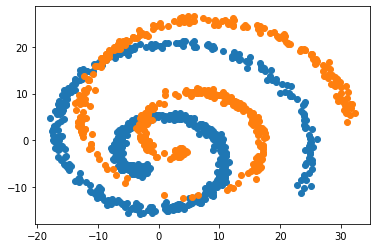

In [2]:
xs = np.loadtxt("datasets/xs.csv", delimiter=',')
yt = np.loadtxt("datasets/yt.csv", delimiter=',')
colors_s = np.loadtxt("datasets/cs.csv", delimiter=',')
colors_t = np.loadtxt("datasets/ct.csv", delimiter=',')

pca = PCA(n_components=2)
yt_pca = pca.fit_transform(yt)
xs_pca = pca.transform(xs)

plt.scatter(yt_pca[:,0], yt_pca[:,1])
plt.scatter(xs_pca[:,0], xs_pca[:,1])

# Optimal transport integration

In [3]:
# WOTi / OTi
xt = woti.wot_transform(xs, yt, scale=0.1, scale_ref=0.5)
xt_nodens = woti.bot_transform(xs, yt)

xt_pca = pca.transform(xt)
xt_nd_pca = pca.transform(xt_nodens)

     pcost       dcost       gap    pres   dres
 0:  2.3096e-03 -1.3972e+00  1e+00  9e-16  2e+01
 1:  2.3096e-03 -1.1689e-02  1e-02  9e-16  2e-01
 2:  2.3096e-03  2.1663e-03  1e-04  1e-15  2e-03
 3:  2.3096e-03  2.3050e-03  5e-06  2e-16  7e-05
 4:  2.3095e-03  2.3086e-03  9e-07  7e-16  7e-06
 5:  2.3095e-03  2.3093e-03  2e-07  9e-16  8e-07
 6:  2.3095e-03  2.3094e-03  6e-08  4e-16  1e-07
 7:  2.3095e-03  2.3094e-03  2e-08  9e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5083e-03 -1.3978e+00  1e+00  7e-16  3e+01
 1:  1.5083e-03 -1.2485e-02  1e-02  4e-16  3e-01
 2:  1.5083e-03  1.3680e-03  1e-04  1e-15  3e-03
 3:  1.5083e-03  1.5066e-03  2e-06  8e-18  3e-05
 4:  1.5083e-03  1.5081e-03  2e-07  9e-16  4e-06
 5:  1.5083e-03  1.5083e-03  3e-08  8e-16  3e-18
Optimal solution found.


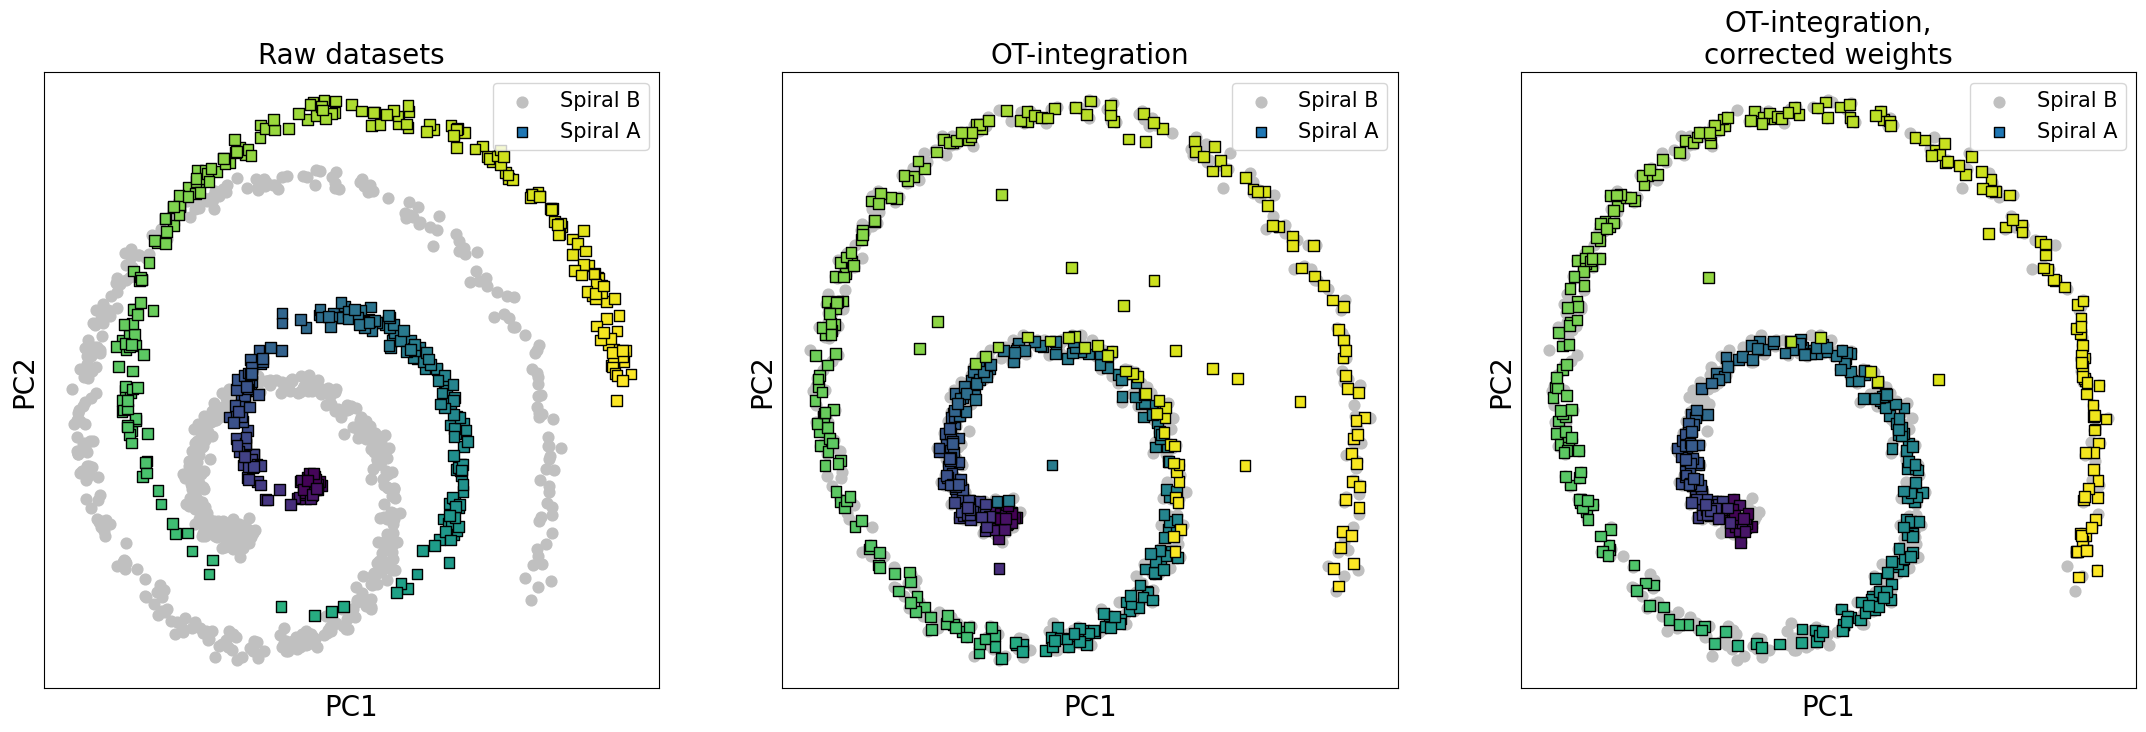

In [4]:
# Optimal transport

plt.style.use('default')

plt.figure(figsize=(27,8))

plt.subplot(1,3,1)
plt.scatter(*yt_pca.T, s=60, c='silver', label='Spiral B')
plt.scatter(*xs_pca.T, s=60, c=colors_s, cmap='viridis', ec='k', label='Spiral A', marker='s')
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('Raw datasets', fontsize=20)

plt.subplot(1,3,2)
plt.scatter(*yt_pca.T, s=60, c='silver', label='Spiral B')
plt.scatter(*xt_nd_pca.T, s=60, c=colors_s, cmap='viridis', ec='k', label='Spiral A', marker='s')
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-integration', fontsize=20)

plt.subplot(1,3,3)
plt.scatter(*yt_pca.T, s=60, c='silver', label='Spiral B')
plt.scatter(*xt_pca.T, s=60, c=colors_s, cmap='viridis', ec='k', label='Spiral A', marker='s')
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-integration,\ncorrected weights', fontsize=20)
pass